<a href="https://colab.research.google.com/github/DhananjayD24/Machine_Learning/blob/main/Linear_Regression/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
#to read dataset
import pandas as pd

In [ ]:
##Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

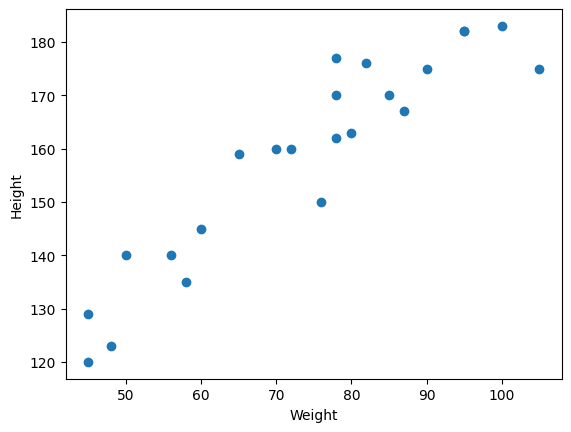

In [ ]:
#to draw graph
import matplotlib.pyplot as plt
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
type(df['Height'])

pandas.core.series.Series

In [ ]:
##divide our dataset into independent and dependent features
X=df[['Weight']] # Independent feature must be in two dimensional
Y=df['Height']

In [ ]:
#split dataset into trainning and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
Y_train

,Height
12,175
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150


In [ ]:
X_train

,Weight
12,105
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Height')

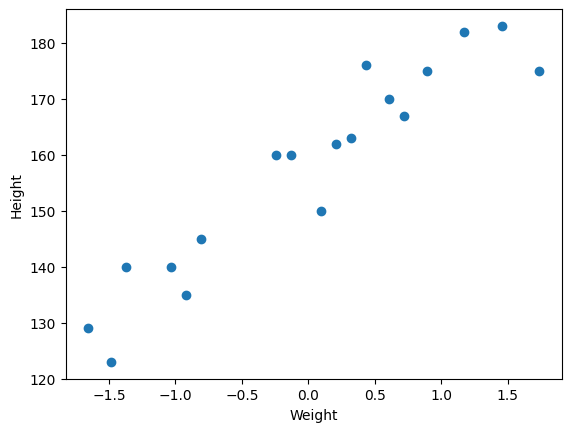

In [ ]:
plt.scatter(X_train,Y_train)
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#Using following library we apply linear regression using cost function MSE. Detailed notes are as shown in following images.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()



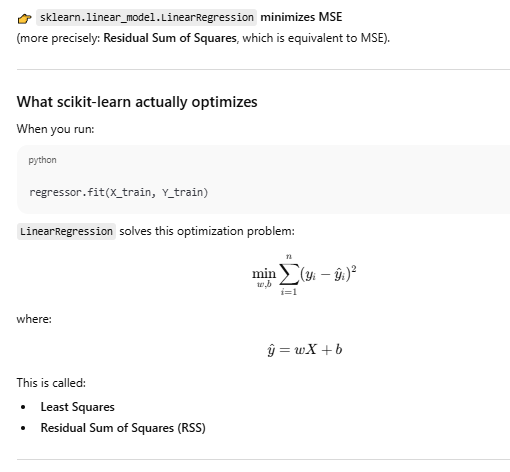

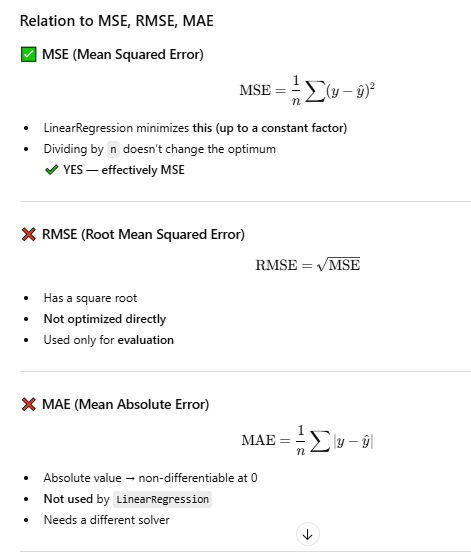

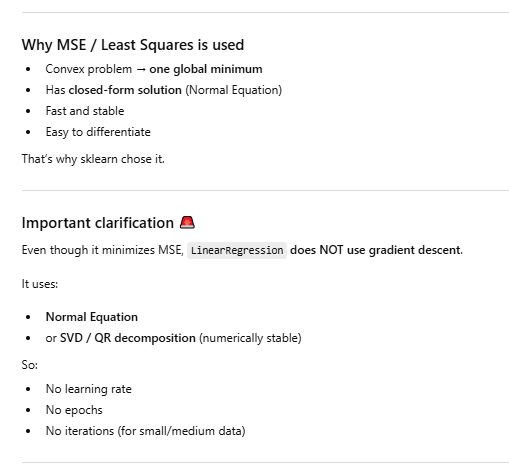

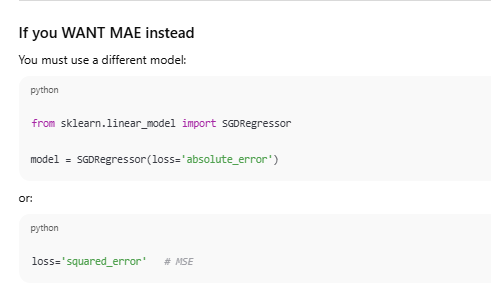



In [ ]:
regressor

LinearRegression()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# we have to covert 1D array into 2D array. because regressor expects 2D array for all independent features. Dependent features can be 1D array
import numpy as np
X_train = np.array(X_train).reshape(-1,1);
X_test = np.array(X_test).reshape(-1,1);

In [ ]:
#Applied linear regression here and trained our model
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


plt.plot() function information, It helps to draw line in graph

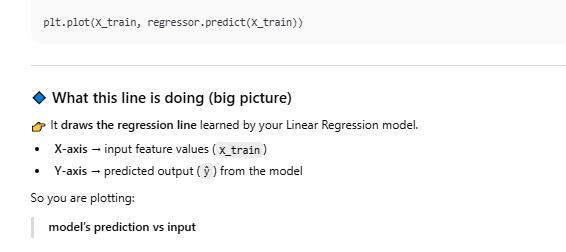

Text(0, 0.5, 'Height')

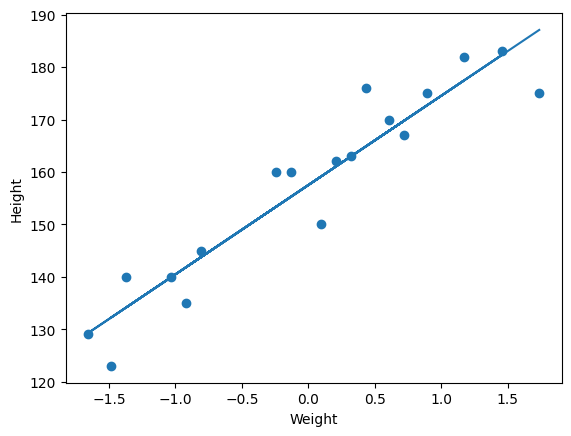

In [ ]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train))
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
# predicted test data as follows
Y_pred_test=regressor.predict(X_test)

Text(0, 0.5, 'Height')

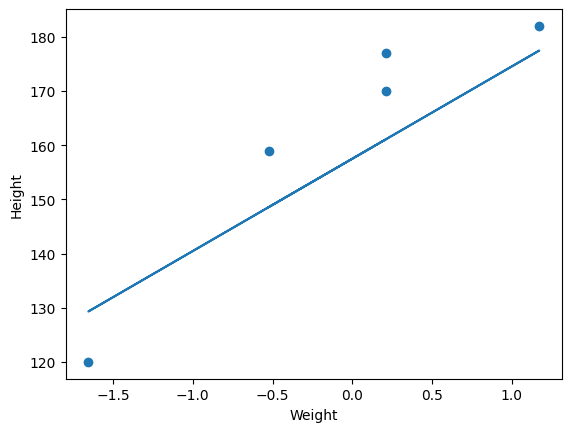

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test))
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,Y_pred_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [ ]:
# Applying performance metrics

# R_squared score as follows
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred_test)
print(score)

0.776986986042344


In [ ]:
# Adjusted_R_squared score as follows
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

In [ ]:
# we have to predict height for let say 75 kg weight
regressor.predict([[75]])

array([1435.08065393])

In [ ]:
# In above case height showing as 1435 which is ofcourse wrong. This is
# beacuse of we didn't Standardize input independent feature. lets do it now and check predicted height.
regressor.predict(scaler.transform([[75]]))

#now its predicting height correctly.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

In [ ]:
## Residuals (means Errors)
residuals = Y_test - Y_pred_test

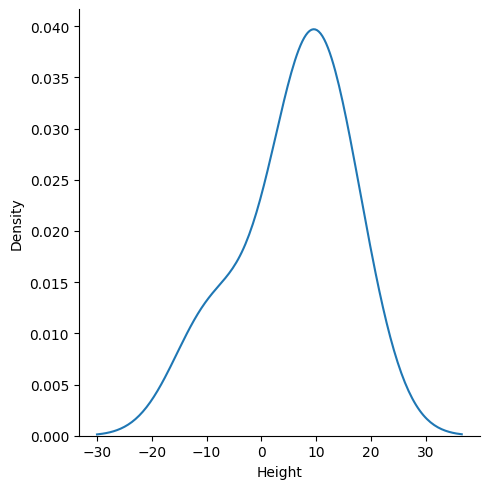

In [ ]:
# plot residuals
import seaborn as sns
sns.displot(residuals,kind="kde")

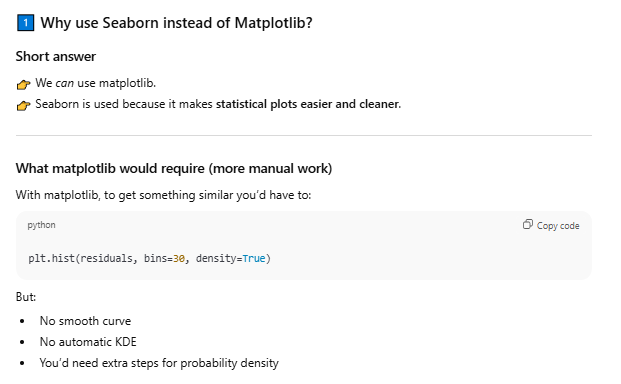

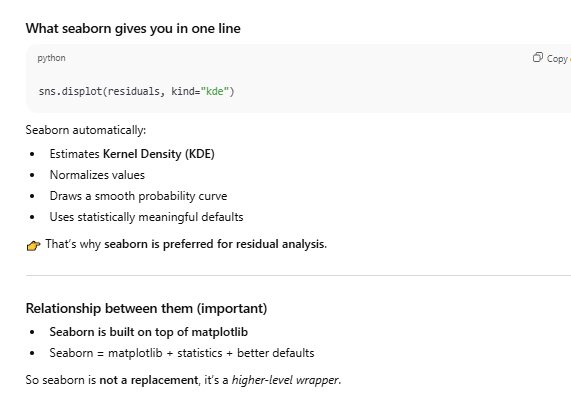

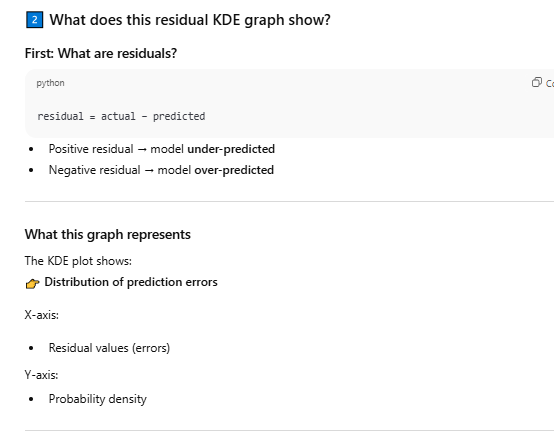

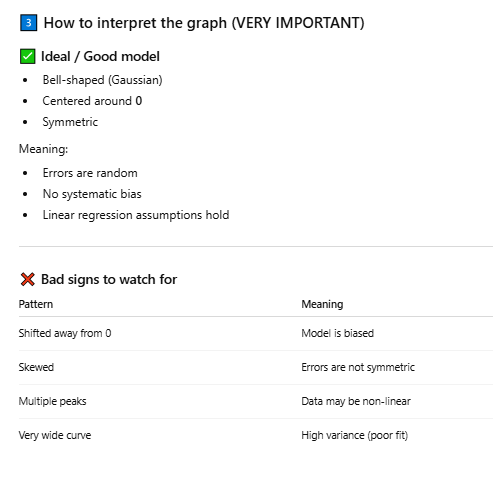

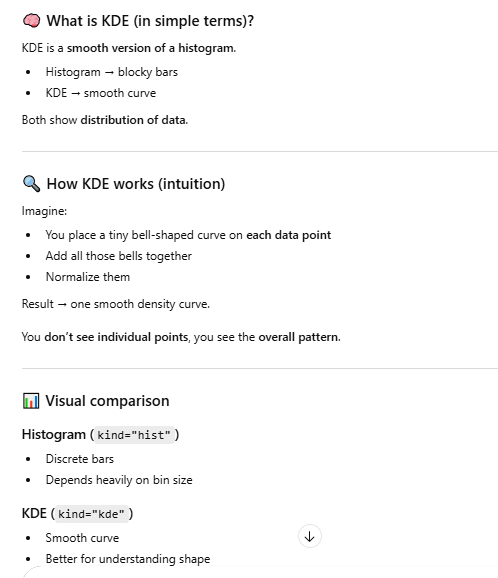

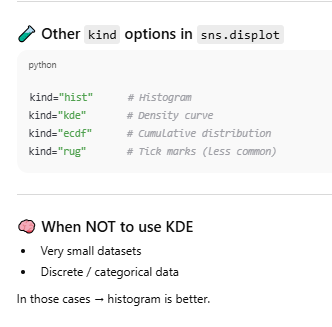



# Using OLS

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_test)

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Thu, 05 Feb 2026   Prob (F-statistic):                       0.661
Time:                        14:23:02   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# See coefficient using OLS is same as coefficient of above best fit line founded using library
regressor.coef_

array([17.03440872])